#Digital Analisis dan Algoritma

**Nama :** Azisya Luthfi Bintang
**NIM :** 2022071051

---
**Dynamic Programming**

Bilangan Fibonanci

In [ ]:
nterms = int(input("How many terms? "))
n1, n2 = 0, 1
count = 0

if nterms <= 0:
  print("Please enter positive integer")
elif nterms == 1:
  print("Fibonanci sequance up to", nterms, ":")
  print(n1)
else:
  print("Fiboccu sequance :")
  while count < nterms:
    print(n1)
    nth = n1+n2
    n1 = n2
    n2 = nth
    count +=1




How many terms? 20
Fiboccu sequance :
0
1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181


In [ ]:
nterms = int(input("How many terms? "))

def recur_fibo(n):
  if n <= 1:
    return n
  else:
    return(recur_fibo(n-1) + recur_fibo(n-2))

if nterms <= 0:
  print("Please enter a positive integer")
else:
  print("Fibonanci sequance:")
  for i in range(nterms):
    print(recur_fibo(i))

How many terms? 20
Fibonanci sequance:
0
1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181


---
**The Traveling Salesperson Problem**

python : preliminaries

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import random
import time
import itertools

In [ ]:
def exact_TSP(cities):
  "generate all possible tours of the cities and choose the shortest one."
  return shortest(alltours(cities))

def shortest(tours):
  "return thetour with the minimum total distance."
  return min(tours, key=total_distance)

In [ ]:
alltours = itertools.permutations
cities = {1,2,3}
list(alltours(cities))

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]

In [ ]:
def total_distance(tour):
  "The total distancec between each pair of consecutive cities in the tour."
  return sum(distance(tour[i], tour[i-1]) for i in range(len(tour)))

In [ ]:
City = complex

def distance(A, B):
  "The distance between two point."
  return abs(A - B)

In [ ]:
A = City(300, 0)
B = City(0, 400)
distance(A, B)

500.0

In [ ]:
def Cities(n):
  "make a set of n cities, each with random coordinates."
  return set(City(random.randrange(10, 890), random.randrange(10, 590)) for c in range(n))

random.seed('seed')
cities8, cities10, cities100, cities1000= Cities(8), Cities(10), Cities(100), Cities(1000)
cities8

{(151+70j),
 (252+365j),
 (303+506j),
 (498+96j),
 (54+361j),
 (551+542j),
 (684+435j),
 (800+430j)}

In [ ]:
tour = exact_TSP(cities8)

print(tour)
print(total_distance(tour))

[(551+542j), (303+506j), (252+365j), (54+361j), (151+70j), (498+96j), (800+430j), (684+435j)]
1990.388372313552


In [ ]:
def alltours(cities):
  "Return a list of tours, each a permutation of cities, but each one starting with the same city."
  start = first(cities)
  return [[start]+list(tour)
          for tour in itertools.permutations(cities-{start})]

def first(collection):
  "start iterating over collection and return the first element."
  for x in collection: return x

In [ ]:
alltours({1,2,3})

[[1, 2, 3], [1, 3, 2]]

In [ ]:
alltours({1,2,3,4})

[[1, 2, 3, 4],
 [1, 2, 4, 3],
 [1, 3, 2, 4],
 [1, 3, 4, 2],
 [1, 4, 2, 3],
 [1, 4, 3, 2]]

In [ ]:
tour = exact_TSP(cities8)

print(tour)
print(total_distance(tour))

[(551+542j), (303+506j), (252+365j), (54+361j), (151+70j), (498+96j), (800+430j), (684+435j)]
1990.388372313552


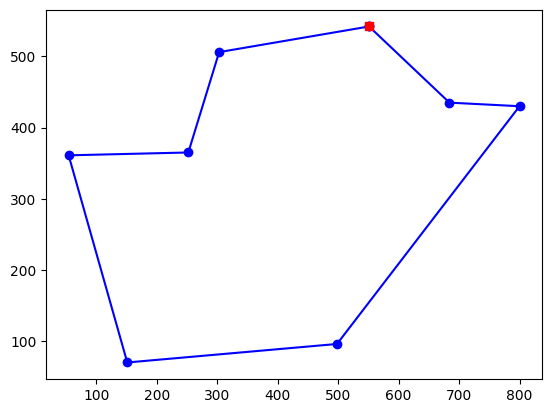

8 City tour; total distance 1990.4; time = 0.024 secs for exact_TSP


In [ ]:
import time

def plot_tour(algorithm, cities):
  "Apply a TSP algorithm cities, and plot the resulting tour."
  t0 = time.time()
  tour = algorithm(cities)
  t1 = time.time()
  plotline(list(tour)+[tour[0]])
  plotline([tour[0]], 'rs')
  plt.show()
  print("{} City tour; total distance {:.1f}; time = {:.3f} secs for {}".format(
      len(tour), total_distance(tour), t1-t0, algorithm.__name__))

def plotline(points, style='bo-'):
  "Ploat a list of points (complex numbers) in the 2-d plane"
  X, Y = XY(points)
  plt.plot(X,Y,style)

def XY(points):
  "given a list of pointsm return two list: X coordinates and Y coordinates."
  return [p.real for p in points], [p.imag for p in points]

plot_tour(exact_TSP, cities8)

In [ ]:
#Greedy Nearest Neighbor (greed_TSP)

def greedy_TSP(cities):
  "At each step, visit the nearest neighboor that is still unvisited."
  start = first(cities)
  tour = [start]
  unvisited = cities - {start}
  while unvisited:
    C = nearest_neighbor(tour[-1], unvisited)
    tour.append(C)
    unvisited.remove(C)
  return tour

def nearest_neighbor(A, cities):
  "Find the ity in citie that is earest to city A"
  return min(cities, key=lambda x: distance(x, A))

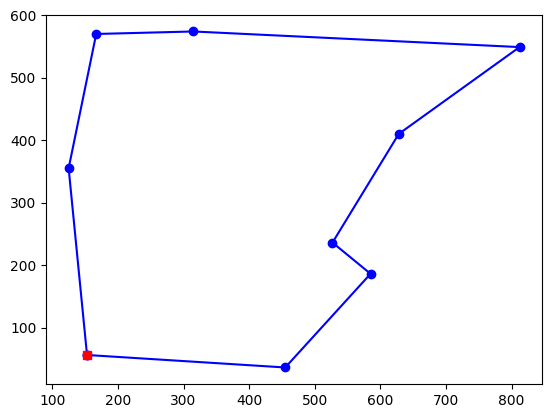

9 City tour; total distance 2174.6; time = 0.156 secs for exact_TSP


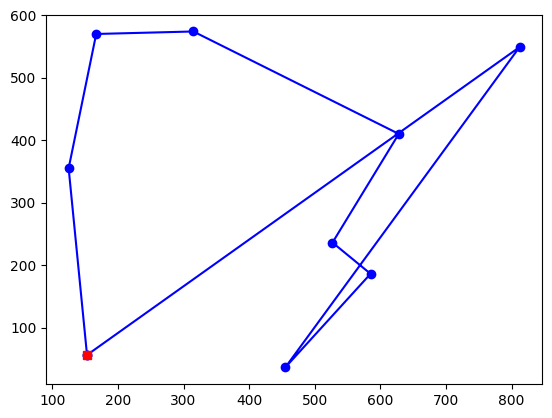

9 City tour; total distance 2945.0; time = 0.000 secs for greedy_TSP


In [ ]:
cities = Cities(9)
plot_tour(exact_TSP, cities)
plot_tour(greedy_TSP, cities)

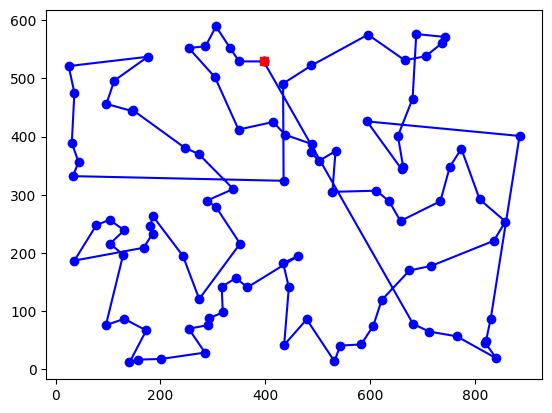

100 City tour; total distance 6987.7; time = 0.002 secs for greedy_TSP


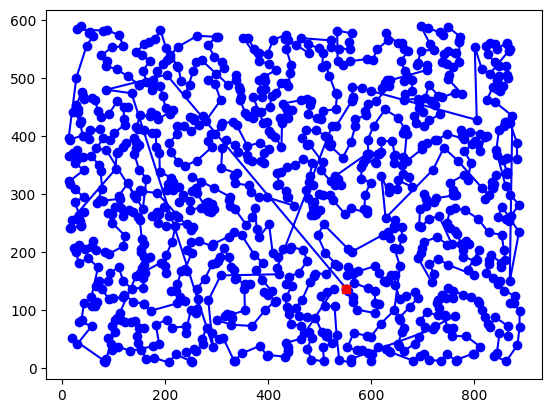

1000 City tour; total distance 20529.4; time = 0.140 secs for greedy_TSP


In [ ]:
plot_tour(greedy_TSP, cities100)
plot_tour(greedy_TSP, cities1000)

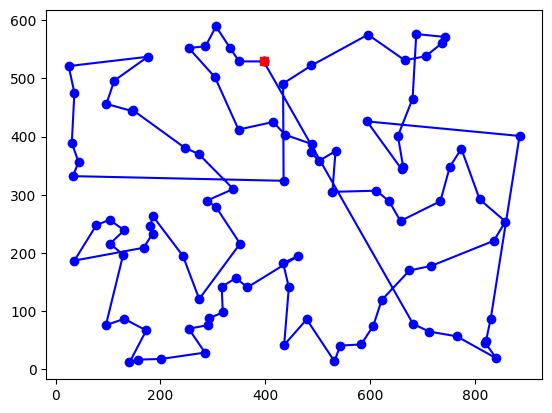

100 City tour; total distance 6987.7; time = 0.002 secs for greedy_TSP


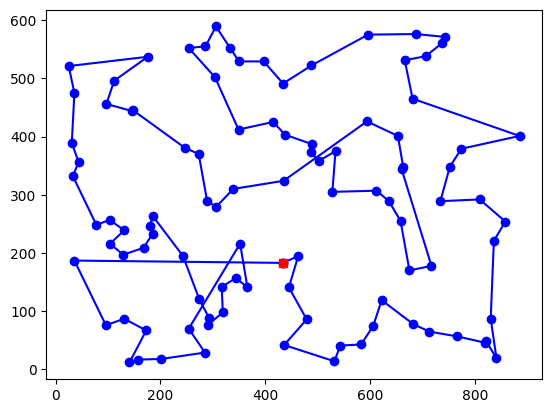

100 City tour; total distance 6213.5; time = 0.158 secs for all_greedy_TSP


In [ ]:
plot_tour(greedy_TSP, cities100)
plot_tour(all_greedy_TSP, cities100)

In [ ]:
def all_greedy_TSP(cities):
  "Try the greedy algorithm from each of the starting cities; return the shortest tour."
  return shortest(greedy_TSP(cities,start=c) for c in cities)

def greedy_TSP(cities, start=None):
  "At each step, visit the nearrest neighbor that isstill unvisited."
  if start is None: start = first(cities)
  tour = [start]
  unvisited = cities - {start}
  while unvisited:
    C = nearest_neighbor(tour[-1], unvisited)
    tour.append(C)
    unvisited.remove(C)
  return tour

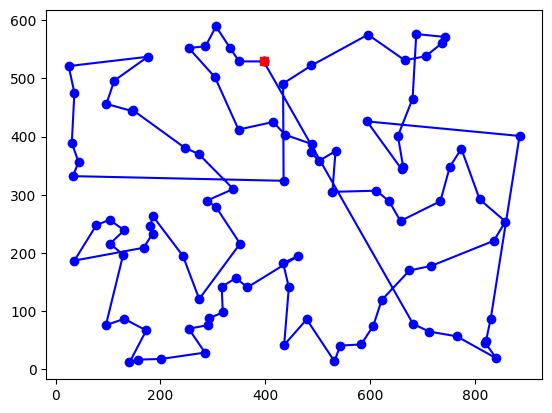

100 City tour; total distance 6987.7; time = 0.002 secs for greedy_TSP


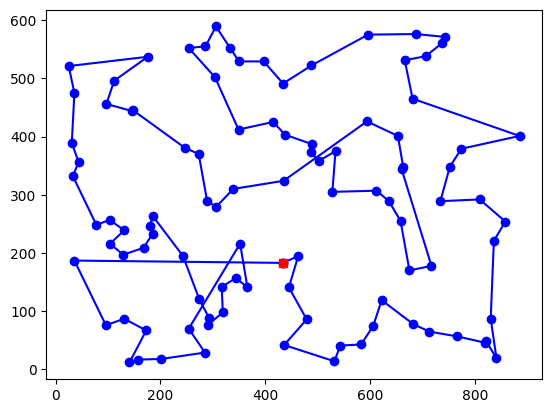

100 City tour; total distance 6213.5; time = 0.146 secs for all_greedy_TSP


In [ ]:
plot_tour(greedy_TSP, cities100)
plot_tour(all_greedy_TSP, cities100)

In [ ]:
def greedy_exact_end_TSP(cities, start=None, end_size=8):
  if start is None: start = first(cities)
  tour = [start]
  unvisited = cities - {start}

  while len(unvisited) > end_size:
    C = nearest_neighbor(tour[-1], unvisited)
    tour.append(C)
    unvisited.remove(C)

  ends = map(list, itertools.permutations(unvisited))
  best = shortest([tour[0], tour[-1]] + end for end in ends)
  return tour + best[2:]

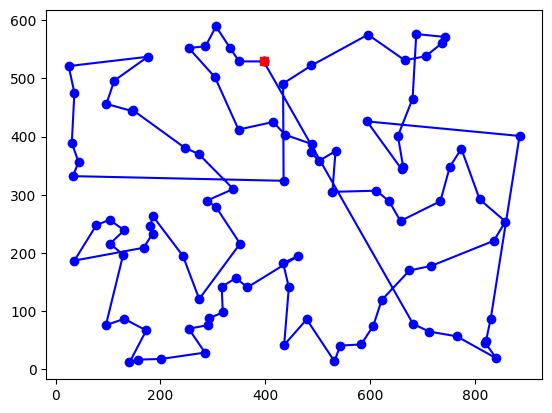

100 City tour; total distance 6987.7; time = 0.312 secs for greedy_exact_end_TSP


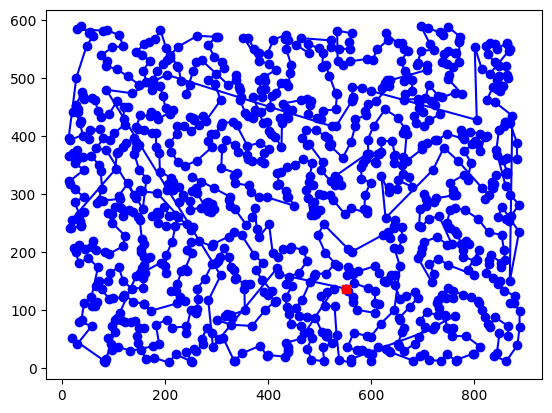

1000 City tour; total distance 20171.0; time = 0.592 secs for greedy_exact_end_TSP


In [ ]:
plot_tour(greedy_exact_end_TSP, cities100)
plot_tour(greedy_exact_end_TSP, cities1000)

In [ ]:
def greedy_bi_TSP(cities, start_size=12, end_size=6):
  "At each step, visit the nearest neighbor that is still unvisited."
  starts = random.sample(cities, min(len(cities), start_size))
  return shortest(greedy_exact_end_TSP(cities, start, end_size)
                  for start in starts)

<ipython-input-66-8f0c7e82ece1>:3: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  starts = random.sample(cities, min(len(cities), start_size))


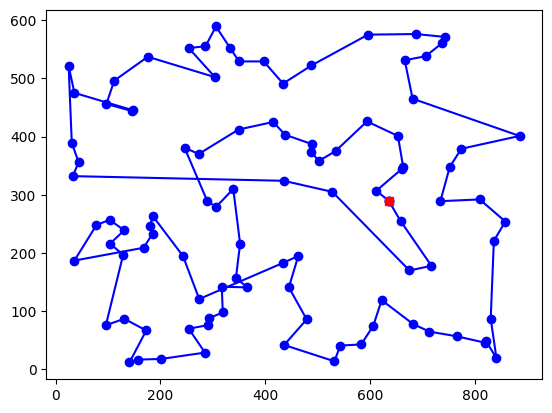

100 City tour; total distance 6230.0; time = 0.052 secs for greedy_bi_TSP


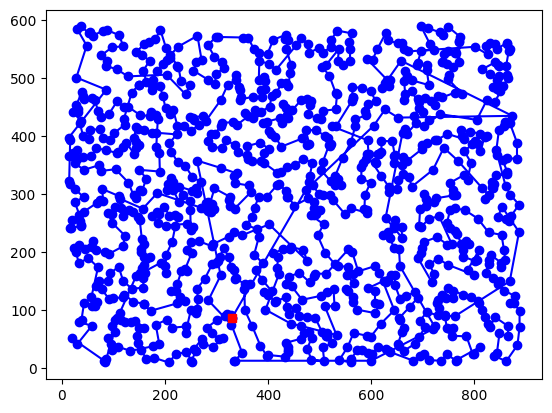

1000 City tour; total distance 20070.7; time = 1.625 secs for greedy_bi_TSP


In [ ]:
random.seed('bi')
plot_tour(greedy_bi_TSP, cities100)
plot_tour(greedy_bi_TSP, cities1000)

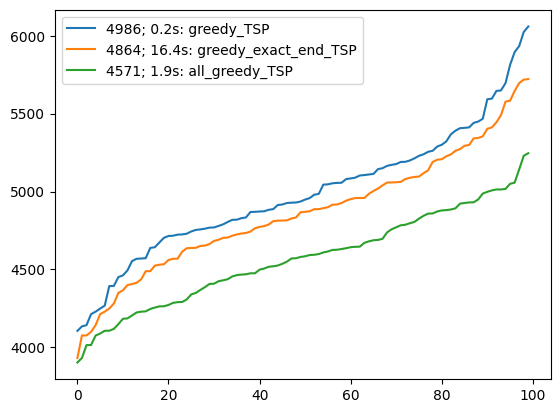

100 x 50-city maps


In [ ]:
#Benchmarking Algorithms
def compare_algorithms(algorithms, maps):
  "Apply each algorithm to each map and plot results."
  for algorithm in algorithms:
    t0 = time.time()
    results = [total_distance(algorithm(m)) for m in maps]
    t1 = time.time()
    avg = sum(results)/ len(results)
    label = '{:.0f}; {:.1f}s: {}'.format(avg, t1-t0, algorithm.__name__)
    plt.plot(sorted(results), label=label)
  plt.legend(loc=2)
  plt.show()
  print('{} x {}-city maps'.format(len(maps), len(maps[0])))

def Maps(M, N):
  "Return a list of M maps, eachconsisting of a set of N cities."
  return [Cities(N) for m in range(M)]

compare_algorithms([greedy_TSP, greedy_exact_end_TSP, all_greedy_TSP], Maps(100, 50))

In [ ]:
def bi_10_6(cities): return greedy_bi_TSP(cities, 10, 6)
def bi_20_5(cities): return greedy_bi_TSP(cities, 20, 5)
def bi_40_4(cities): return greedy_bi_TSP(cities, 40, 4)
def bi_80_2(cities): return greedy_bi_TSP(cities, 80, 2)
def bi_160_1(cities): return greedy_bi_TSP(cities, 160, 1)

algorithms = [bi_10_6, bi_20_5, bi_40_4, bi_80_2, bi_160_1]

<ipython-input-66-8f0c7e82ece1>:3: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  starts = random.sample(cities, min(len(cities), start_size))


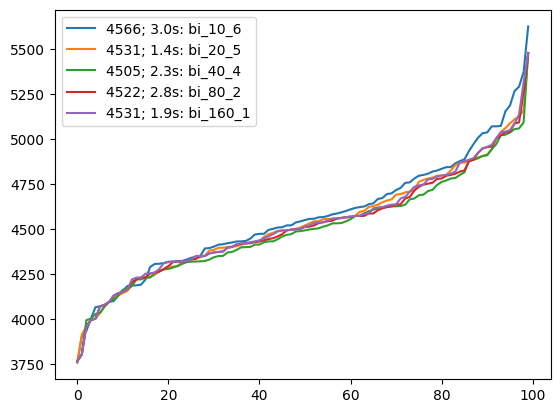

100 x 50-city maps


In [ ]:
compare_algorithms(algorithms, Maps(100, 50))

<ipython-input-66-8f0c7e82ece1>:3: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  starts = random.sample(cities, min(len(cities), start_size))


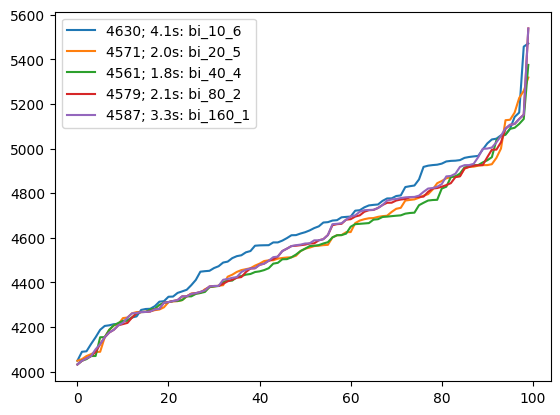

100 x 50-city maps


In [ ]:
compare_algorithms(algorithms, Maps(100, 50))

<ipython-input-66-8f0c7e82ece1>:3: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  starts = random.sample(cities, min(len(cities), start_size))


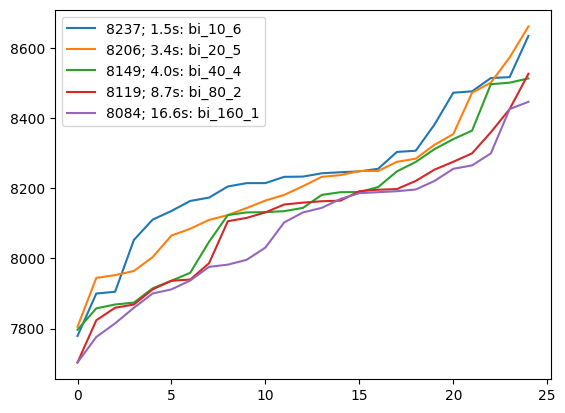

25 x 160-city maps


In [ ]:
compare_algorithms(algorithms, Maps(25, 160))

---

**Algoritma Greedy: Huffman Coding**

penerapan algoritma greedy dengan huffman coding

In [ ]:
string = 'BCAADDDCCACACAC'

class NodeTree(object):
  def __init__(self, left=None, right=None):
    self.left = left
    self.right = right

  def childern(self):
    return (self.left, self.right)

  def nodes(self):
    return (self.left, self.right)

  def __str__(self):
    return '%s_%s' % (self.left, self.right)

In [ ]:
def huffman_code_tree(node, left=True, binString=''):
  if type(node) is str:
    return{node: binString}
  (l, r) = node.childern()
  d = dict()
  d.update(huffman_code_tree(l, True, binString + '0'))
  d.update(huffman_code_tree(r, False, binString + '1'))
  return d

In [ ]:
freq = {}
for c in string:
  if c in freq:
    freq[c] += 1
  else:
    freq[c] =1

freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)

nodes = freq

while len(nodes) > 1:
  (key1, c1) = nodes[-1]
  (key2, c2) = nodes[-2]
  nodes = nodes[:-2]
  node = NodeTree(key1, key2)
  nodes.append((node, c1+c2))

  nodes = sorted(nodes, key=lambda x: x[1], reverse=True)

huffmanCode = huffman_code_tree(nodes[0][0])

print('Char | Huffman code')
print('-------------------')
for(char, frequency) in freq:
  print('%-4r |%12s' % (char, huffmanCode[char]))

Char | Huffman code
-------------------
'C'  |           0
'A'  |          11
'D'  |         101
'B'  |         100


In [ ]:
import heapq

class node:
  def __init__(self, freq, symbol, left=None, right=None):
    self.freq = freq

    self.symbol = symbol

    self.left = left

    self.right = right

    self.huff = ''

  def __lt__(self, nxt):
    return self.freq < nxt.freq

def printNodes(node, val=''):
  newVal = val + str(node.huff)

  if(node.left):
    printNodes(node.left, newVal)
  if(node.right):
    printNodes(node.right, newVal)

  if(not node.left and not node.right):
    print(f"{node.symbol} -> {newVal}")

chars = ['a', 'b', 'c', 'd', 'e', 'f']

freq = [5, 9, 12, 13, 16, 45]

nodes = []

for x in range(len(chars)):
  heapq.heappush(nodes, node(freq[x], chars[x]))

while len(nodes) > 1:
  left = heapq.heappop(nodes)
  right = heapq.heappop(nodes)

  left.huff = 0
  right.huff = 1

  newNode = node(left.freq+right.freq, left.symbol+right.symbol, left, right)

  heapq.heappush(nodes, newNode)

printNodes(nodes[0])

f -> 0
c -> 100
d -> 101
a -> 1100
b -> 1101
e -> 111
